# Data Exploration

## Missing Data

Missing data was addressed in the following columns as follows:
1. Account bio      -> N/A
2. Location         -> N/A
3. Tweet Translated -> N/A
4. Screenshot       -> N/A
5. Rating           -> N/A
6. Remarks          -> N/A
7. Quote Tweets     -> 0

---

## One Hot Encoding

One-hot encoding was performed on the following columns:
1. Account type
2. Content type
3. Stance on Sara


### Account type

The 'Account type' column is rewritten into the following columns:
1. Anonymous
2. Identified
3. Media


### Content type

The 'Contenty type' column is rewritten into the following columns:
1. Emotional
2. Rational
3. Transactional


### Stance on Sara

The 'Stance on Sara' column is rewritten into the following columns:
1. Pro-Sara
2. Anti-Sara
3. Ambiguous

---

## Date Adjustment

For the 'Date posted' column, the time is omitted to help get a better/tighter view of the particular day and month when a tweet was posted.

---

## Removal of Data Features

The 'Views' column was omitted due to sparcity of data and no clear way to assign an estimated view due to skewed view counts of tweets that do have a view count.

---

! Run the cell below to load the dataset

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

from sklearn.preprocessing import OneHotEncoder

tweet_df = pd.read_csv('group25_data.csv', encoding='latin_1', na_filter = False)
print(tweet_df)

         ID          Timestamp  \
0      25-1  15/03/23 10:03:46   
1      25-2  15/03/23 10:58:26   
2      25-3  15/03/23 12:52:09   
3      25-4  15/03/23 12:52:12   
4      25-5  15/03/23 12:52:15   
..      ...                ...   
153  25-154  4/19/2023 4:37:00   
154  25-155  4/19/2023 4:37:02   
155  25-156  4/19/2023 4:37:03   
156  25-157  4/19/2023 4:37:06   
157  25-158  4/19/2023 4:37:07   

                                             Tweet URL Group        Collector  \
0    https://twitter.com/kyeiaaaa/status/1539408632...    25   Cunanan, Ridge   
1    https://twitter.com/itsTimheD_/status/15424700...    25   Cunanan, Ridge   
2    https://twitter.com/DIFFANG1/status/1607271052...    25   Cunanan, Ridge   
3    https://twitter.com/Mike62091243/status/152470...    25   Cunanan, Ridge   
4    https://twitter.com/Jeongyawnie/status/1524668...    25   Cunanan, Ridge   
..                                                 ...   ...              ...   
153  https://twitter.com

## Comparison of Stance on Sara Values

The following code produces a bar graph of the data for the Stance on Sara feature. Note that the feature was hot-encoded prior to graphing.

---

! Run the cell below to produce the bar graph

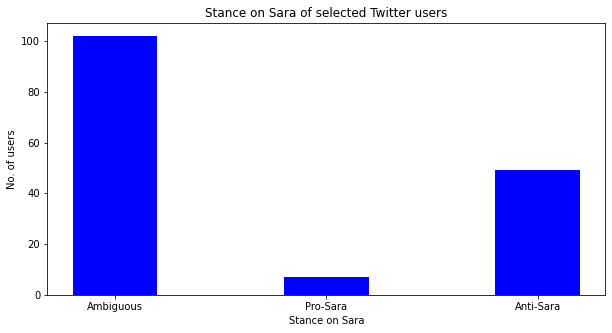

In [30]:
# Find summation of each feature to find the total number of accounts with the stance
# This is possible because the columns only have 1 or 0 thanks to one-hot encoding
ambiguous_cnt = tweet_df['Ambiguous'].sum()
pro_cnt = tweet_df['Pro-Sara'].sum()
anti_cnt = tweet_df['Anti-Sara'].sum()

stances = ['Ambiguous', 'Pro-Sara', 'Anti-Sara']
counts = [ambiguous_cnt, pro_cnt, anti_cnt]

fig = plt.figure(figsize = (10, 5))

plt.bar(stances, counts, color='blue', width=0.4)

plt.xlabel("Stance on Sara")
plt.ylabel("No. of users")
plt.title("Stance on Sara of selected Twitter users")
plt.show()

## Temporal Data Analysis

The following code produces a line graph of the dates when the tweets were posted.

---

! Run the code below to produce the line graph

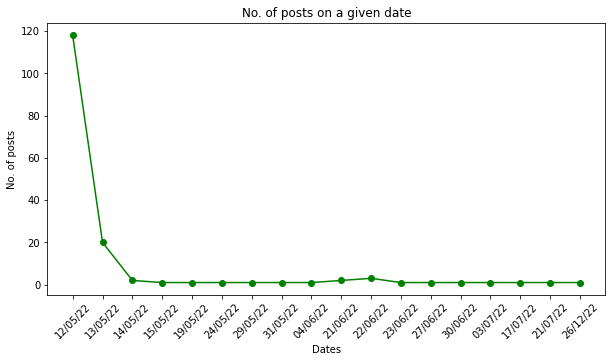

In [48]:
# Sorting function for dates
def dateSort(datesList):
    split_up = datesList.split('/')
    return split_up[2], split_up[1], split_up[0]

dates_dict = tweet_df['Date posted'].value_counts().to_dict()
dates = list(dates_dict.keys())
dates.sort(key=dateSort)

date_counts = []

# Produce value list that corresponds to order of the 'dates' list
for i in dates:
    date_counts.append(dates_dict[i])

fig = plt.figure(figsize = (10, 5))
plt.plot(dates, date_counts, '-go')

plt.xlabel("Dates")
plt.xticks(dates, dates, rotation=45)
plt.ylabel("No. of posts")
plt.title("No. of posts on a given date")
plt.show()